In [1]:
##Import packages and files
from itertools import compress, product
import numpy as np
import matplotlib.pyplot as plt
import array
import random
import pandas as pd
import itertools
import operator
import importlib
#import functions defining the layered landscape
from LayeredLandscapeFunctions import *
import networkx as nx


In [2]:
#Algorithm 2 Iterated Local Search (ILS)
#Require: Solution space S,
#Fitness function f(S),
#Neighborhood function N(S),
#Stopping threshold t
#1: Choose initial random solution s0 ∈ S
#2: s ← hillClimb(s0)
#3: i ← 0
#4: repeat
#5: s0 ← perturbation(s∗)
#6: s'0 ← hillClimb(s0)
#7: if (s∗''= s∗) ∧ (f(s∗0) > f(s∗)) then
#8: s∗ ← s∗''
#9: i ← 0
#10: end if
#11: i ← i + 1
#12: until i ≥ t
#13: return s∗

In [214]:
def Perturbation(Position,D):
    N=len(Position)
    s = list(range(N))
    random.shuffle(s)
       #Take a step by picking a random gene to change
    first_sample = s[-D:]
    for i in first_sample:
        Position[i] = abs(Position[i]-1)
    return(Position)



In [7]:
##There is a decision to be made about how to store the values
#I choose to create an L by L matrix where L is the total number of local optima
#the rows and columns of L are the fitness values of the Local Optima,
#each cell has an integer for the number of times, after a pertubation, a row 
#optima maps to a column optima
#a Seperate array stores the mapping of fitnesses of L to actual locations,
#this is done because it is extremely unlikely two local optima share a fitness

def Iterated_Local_Search(Landscape1, Landscape2, Landscape_Weights, M, D,t, NumSims):
    for Sim in range(NumSims):
        print('Sim is',Sim)
        if Sim==0:
            df = pd.DataFrame() #creates a new dataframe that's empty
        s0 = Position_rand(N)#1 random location
        s_star = Hill_Climb(s0,Landscape1, Landscape2, Landscape_Weights, M) #2, Hill Climb initial 
        f_s_star = Get_Fitness_Layered_Landscape(Landscape1, Landscape2, Landscape_Weights, s_star)
        i=0 #set i equal to 0
        if f_s_star not in (df.index.values): #add a row if necessary
            df = df.append(pd.Series(name=(f_s_star)))
            df[f_s_star]=0
        while(i<t):
            df = df.fillna(0) #replace nas with zeros

            s_prime = Perturbation(s_star, D)#perturb
            s_prime_star = Hill_Climb(s_star,Landscape1, Landscape2,Landscape_Weights,M) #climb new hill
            f_s_prime_star = Get_Fitness_Layered_Landscape(Landscape1, Landscape2, Landscape_Weights, s_prime_star)

            if f_s_star not in (df.index.values): #add a row if necessary
                    df = df.append(pd.Series(name=(f_s_star)))
            if f_s_prime_star not in df.columns:                    #add column if necessary
                    df[f_s_prime_star]=0 #set to zero
                    df.at[f_s_star, f_s_prime_star] = 0
            if f_s_prime_star not in df.index.values:                    #add column if necessary
                    df = df.append(pd.Series(name=(f_s_prime_star)))
            #update the transition matrix
            df.at[f_s_star, f_s_prime_star] =  df.at[f_s_star, f_s_prime_star]+1 

            #check for new maxima
            if ((s_prime_star!=s_star).any() and (f_s_prime_star > f_s_star)):
                #reset finteses
                i=0 ###IN ORIGNAL THIS IS NOT COMMENTED OUT
                #df.at[f_s_star, f_s_prime_star] =  df.at[f_s_star, f_s_prime_star]+1 #add one to the value of the edge

                #update the fitness and location if higher
                f_s_star = f_s_prime_star 
                s_star = s_prime_star

                #add i=i+1 since we allow change in optima (against paper) 
                #i = i + 1 ###NOT IN ORIGNINAL ALGORITHM 

            else:
                #update counter
                i = i + 1
    return(df)


In [209]:
##Functions for markov clustering

## Expansion Power
EXPANSION_POWER = 1.5
## Inflation power and number of iterations 
# iterations really should not be preset and should be coded as stopping at convergence)
INFLATION_POWER = 1.5
#ITERATION_COUNT = 40
def normalize(matrix):
    return matrix/np.sum(matrix, axis=0)

def expand(matrix, power):
    return matrix**power

def inflate(matrix, power):
    for entry in np.nditer(matrix, op_flags=['readwrite']):
        #print(entry)
        entry[...] = entry**power
        #print(entry)
    return matrix

def run(matrix):
    #np.fill_diagonal(matrix, 1)
    #print(matrix)
    matrix = normalize(matrix)
    #nan to 0
    #matrix = np.nan_to_num(matrix)

    OldMatrix = np.zeros((len(matrix),len(matrix)))


    #keep looping until convergence
    while ((matrix == OldMatrix).all())==False:
        OldMatrix = matrix
        matrix = normalize(inflate(expand(matrix, EXPANSION_POWER), INFLATION_POWER))
        matrix = np.nan_to_num(matrix)
        #print((OldMatrix-matrix).sum())
    return matrix


In [210]:
N=10
K1=4
K2=0
M=1 #local search area, you look for first higher not the highest gradient
D=2 #length of jump from a peak
t=100 
NumSims=100 #number of random initial starting values
Landscape_Weights = [1,0]
(Landscape1, Landscape2) = Generate_Layered_Landscapes(N,K1,K2)
Transition_Matrix = Iterated_Local_Search(Landscape1, Landscape2, Landscape_Weights, M, D,t,NumSims) #this is a pandas dataframe
#of the network with cells corresponding to number of times row maxima maps to column maxima

Sim is 0
Sim is 1
Sim is 2
Sim is 3
Sim is 4
Sim is 5
Sim is 6
Sim is 7
Sim is 8
Sim is 9
Sim is 10
Sim is 11
Sim is 12
Sim is 13
Sim is 14
Sim is 15
Sim is 16
Sim is 17
Sim is 18
Sim is 19
Sim is 20
Sim is 21
Sim is 22
Sim is 23
Sim is 24
Sim is 25
Sim is 26
Sim is 27
Sim is 28
Sim is 29
Sim is 30
Sim is 31
Sim is 32
Sim is 33
Sim is 34
Sim is 35
Sim is 36
Sim is 37
Sim is 38
Sim is 39
Sim is 40
Sim is 41
Sim is 42
Sim is 43
Sim is 44
Sim is 45
Sim is 46
Sim is 47
Sim is 48
Sim is 49
Sim is 50
Sim is 51
Sim is 52
Sim is 53
Sim is 54
Sim is 55
Sim is 56
Sim is 57
Sim is 58
Sim is 59
Sim is 60
Sim is 61
Sim is 62
Sim is 63
Sim is 64
Sim is 65
Sim is 66
Sim is 67
Sim is 68
Sim is 69
Sim is 70
Sim is 71
Sim is 72
Sim is 73
Sim is 74
Sim is 75
Sim is 76
Sim is 77
Sim is 78
Sim is 79
Sim is 80
Sim is 81
Sim is 82
Sim is 83
Sim is 84
Sim is 85
Sim is 86
Sim is 87
Sim is 88
Sim is 89
Sim is 90
Sim is 91
Sim is 92
Sim is 93
Sim is 94
Sim is 95
Sim is 96
Sim is 97
Sim is 98
Sim is 99


In [211]:
#Prepare data frame of network connections for markov clustering
Transition_Matrix_New = Transition_Matrix.div(Transition_Matrix.sum(axis=1), axis=0)

Transition_Matrix_New_Transpose=Transition_Matrix_New.transpose()
TNumpy = Transition_Matrix_New_Transpose.to_numpy()
TNumpy = np.nan_to_num(TNumpy)


In [212]:
MarkovMatrix = run(TNumpy)
#replace nan with 0
MarkovMatrix2 = np.nan_to_num(MarkovMatrix)
MarkovMatrix2.sum(axis=0)


/Users/adrianapaza/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [205]:
##PLOT

MarkClsuMatrix = nx.from_numpy_matrix(MarkovMatrix2) #convert to adjacency matrix undirected

W = nx.DiGraph(MarkovMatrix2) #convert to directed graph (digraph)
OG = nx.DiGraph(Transition_Matrix_New) #convert original probability graph to directed graph




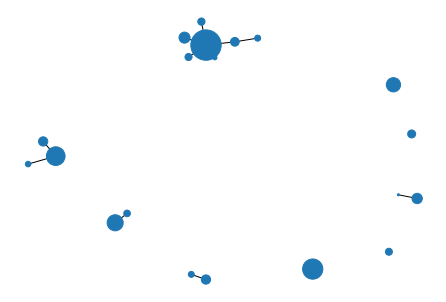

In [206]:
#set node size based upon some scaling of the fitness
node_sizes = (Transition_Matrix_New.index.values**15)/sum(Transition_Matrix_New.index.values**15)*3000
nx.draw(MarkClsuMatrix, node_size=node_sizes, labels=G.index.values,
        with_labels=False,arrows=True)




In [215]:
Transition_Matrix_New.index.values/sum(Transition_Matrix_New.index.values)*10000

array([359.26182636, 371.62843988, 341.27973915, 307.42771676,
       376.7454824 , 329.6192819 , 327.7111532 , 326.71660813,
       312.84558291, 352.93459658, 407.65482561, 351.22984293,
       356.21409089, 342.90585978, 338.54398292, 317.5533455 ,
       301.6857755 , 273.7878118 , 357.45114493, 337.96578242,
       377.75009909, 390.36319162, 351.56959633, 347.965274  ,
       325.30974385, 351.52103809, 380.84076829, 325.64346341,
       357.87393578])

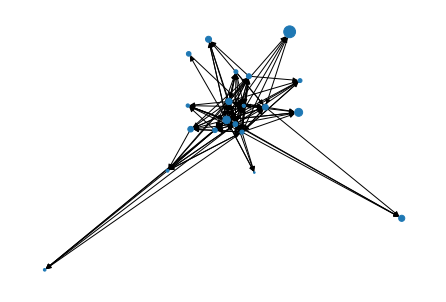

In [216]:
#set node size based upon some scaling of the fitness
node_sizes = (Transition_Matrix_New.index.values**10)/sum(Transition_Matrix_New.index.values**10)*1000
nx.draw(OG, node_size=node_sizes, labels=Transition_Matrix_New.index.values,
        with_labels=False,arrows=True)




In [139]:
OG

In [213]:
#set node size based upon some scaling of the fitness
#node_sizes = (G.index.values)**10*30000
#nx.draw(W, node_size=node_sizes,
#        with_labels=False,arrows=True)
#plt.show()
